#### Gold Prices In Egypt Since 2014

the prices in this project are probably not all correct, some are correct and some are nearly correct, I tried my best to find best website with data from 2014

In [16]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Creating an empty dataframe to add information to it
df = pd.DataFrame()

In [18]:
#Here is a nested loop to loop around all pages on website from 2014 to 2024
for year in range(2014, 2025):
    for month in range(1, 13):
        url = f'https://www.bullion-rates.com/gold/EGP/{year}-{month}-history.htm'
        page = requests.get(url)
        
        #I did this in case page was not found for any reason
        if page.status_code != 200:
            print(f"Failed to retrieve data for {year}-{month}")
            continue
        soup = BeautifulSoup(page.text, 'html')

        #Here I am focusing on the data table located in the website
        table = soup.find('table', class_='Grid History')

        #In case of any error
        if not table:
            print(f"No data available for {year}-{month}")
            continue

        #I did this to add the titles only once for a faster operation
        if df.empty:
            table_titles = [th.text.strip() for th in table.find_all('th')]
            df = pd.DataFrame(columns=table_titles)
        table_rows = table.find_all('tr')

        #Here I am looping through rows of data
        for row in table_rows:
            table_data = row.find_all('td', class_='rate')
            table_data_text = [td.text.strip() for td in table_data]

            if table_data_text:
                length = len(df)
                df.loc[length] = table_data_text

In [19]:
df.head()

,,Gold Price/oz,Gold Price/gram
0,02/01/14,"8,510.15",273.61
1,03/01/14,"8,608.94",276.78
2,06/01/14,"8,610.23",276.83
3,07/01/14,"8,573.15",275.63
4,08/01/14,"8,529.94",274.24


In [21]:
#Renaming for a more clear dataset
df.rename(columns={'': 'Date'}, inplace= True)

In [22]:
#Turning Date from string to datatime type
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\TECHNICAL\AppData\Local\Temp\ipykernel_4748\3610175372.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [23]:
#Replacing , with nothing so i can turn them to floats
#I understand that this will make reading the number harder but easier visiualization
df.replace(',', '', regex = True, inplace=True)

In [24]:
#Turning numbers to floats instead of strings
df['Gold Price/gram'] = df['Gold Price/gram'].astype(float)
df['Gold Price/oz'] = df['Gold Price/oz'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2843 entries, 0 to 2842
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2843 non-null   datetime64[ns]
 1   Gold Price/oz    2843 non-null   float64       
 2   Gold Price/gram  2843 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 88.8 KB


In [25]:
#Making columns for 21K because no one wear 24K gold
df['21K_Gold_Price/gram'] = df['Gold Price/gram'] * (21 / 24)
df['21K_Gold_Price/oz'] = df['Gold Price/oz'] * (21 / 24)

In [26]:
df.head()

,Date,Gold Price/oz,Gold Price/gram,21K_Gold_Price/gram,21K_Gold_Price/oz
0,2014-02-01,8510.15,273.61,239.40875,7446.38125
1,2014-03-01,8608.94,276.78,242.18250,7532.82250
2,2014-06-01,8610.23,276.83,242.22625,7533.95125
3,2014-07-01,8573.15,275.63,241.17625,7501.50625
4,2014-08-01,8529.94,274.24,239.96000,7463.69750


In [28]:
#Here I am get mean gold value by every month for a smoother and better visiualization
date = df.sort_values(by='Date')
date = df.set_index('Date')
df_monthly = date.resample('M').mean()

C:\Users\TECHNICAL\AppData\Local\Temp\ipykernel_4748\2588113532.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = date.resample('M').mean()


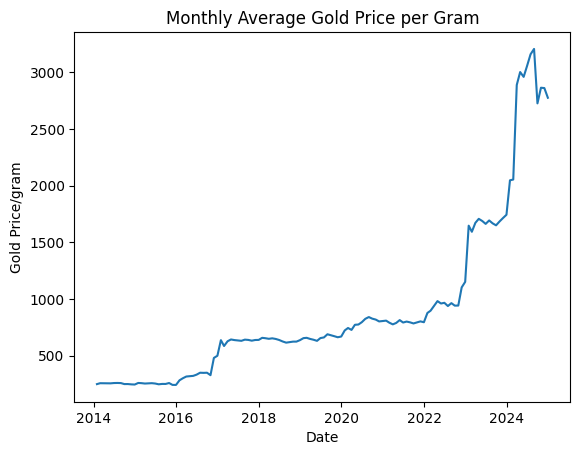

In [29]:
#Visiualization
plt.plot(df_monthly.index, df_monthly['21K_Gold_Price/gram'])
plt.title('Monthly Average Gold Price per Gram')
plt.xlabel('Date')
plt.ylabel('Gold Price/gram')
plt.show()